<a href="https://colab.research.google.com/github/kor1999/Project_course/blob/master/Project_Muhammad_Fahim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [10]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


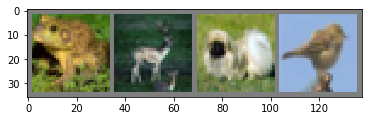

 frog  deer   dog  bird


In [11]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6,kernel_size = 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16,kernel_size = 5)
        self.conv2_drop = nn.Dropout2d()

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.dropout(x, training=self.training)
        x = self.fc3(x)
        return x


net = Net()

In [0]:
import torch.optim as optim
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [14]:
import time
start_time = time.time()
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d]' %
                  (epoch + 1, i + 1))
            running_loss = 0.0

print('Finished Training')
print('Time' + str(start_time - time.time()))

[1,  2000]
[1,  4000]
[1,  6000]
[1,  8000]
[1, 10000]
[1, 12000]
[2,  2000]
[2,  4000]
[2,  6000]
[2,  8000]
[2, 10000]
[2, 12000]
[3,  2000]
[3,  4000]
[3,  6000]
[3,  8000]
[3, 10000]
[3, 12000]
[4,  2000]
[4,  4000]
[4,  6000]
[4,  8000]
[4, 10000]
[4, 12000]
[5,  2000]
[5,  4000]
[5,  6000]
[5,  8000]
[5, 10000]
[5, 12000]
[6,  2000]
[6,  4000]
[6,  6000]
[6,  8000]
[6, 10000]
[6, 12000]
[7,  2000]
[7,  4000]
[7,  6000]
[7,  8000]
[7, 10000]
[7, 12000]
[8,  2000]
[8,  4000]
[8,  6000]
[8,  8000]
[8, 10000]
[8, 12000]
[9,  2000]
[9,  4000]
[9,  6000]
[9,  8000]
[9, 10000]
[9, 12000]
[10,  2000]
[10,  4000]
[10,  6000]
[10,  8000]
[10, 10000]
[10, 12000]
[11,  2000]
[11,  4000]
[11,  6000]
[11,  8000]
[11, 10000]
[11, 12000]
[12,  2000]
[12,  4000]
[12,  6000]
[12,  8000]
[12, 10000]
[12, 12000]
[13,  2000]
[13,  4000]
[13,  6000]
[13,  8000]
[13, 10000]
[13, 12000]
[14,  2000]
[14,  4000]
[14,  6000]
[14,  8000]
[14, 10000]
[14, 12000]
[15,  2000]
[15,  4000]
[15,  6000]
[15,  8000

In [15]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 72 %
